In [0]:
from fastai import*
from fastai.vision import*

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
from google.colab import files
files.upload()

Saving angry.txt to angry.txt
Saving sad.txt to sad.txt
Saving shock.txt to shock.txt
Saving smiling.txt to smiling.txt


{'angry.txt': b'https://assets.ldscdn.org/47/fd/47fddc3cee33e2331e3d538a86b89cf1e5d41147/jesus_synogogue_barrett.jpeg\nhttps://2.bp.blogspot.com/-TJQ9upDyr5g/VtyBwJW3I5I/AAAAAAAAvCE/QtCkwImaV8w/s640/00000.jpg\nhttps://ahseeit.com//king-include/uploads/2019/01/47583828_273698076648108_6779309663836786325_n-3796283709.jpg\nhttps://cdn.telanganatoday.com/wp-content/uploads/2016/11/5ef1795ba2744a178f0cd2d19e2fc015-5ef1795ba2744a178f0cd2d19e2fc015-09b8370d94f80139aa0f6a7067005b2e-e8ece-1024x678.jpg\nhttps://www.thesocialmonk.com/wp-content/uploads/2018/05/Angry-People-Sets-Police-Station-On-Fire-After-9-YO-Girl-Was-Molested-In-Andra-Pradesh-cover.jpg\nhttps://making-the-web.com/sites/default/files/clipart/172762/photos-angry-people-172762-5647719.jpg\nhttps://i.dailymail.co.uk/i/pix/2014/03/16/article-2581997-0395DFA4000005DC-269_306x449.jpg\nhttp://www.speeli.com/question/452/2016-06-30_385Anger2.jpg\nhttps://i2-prod.mirror.co.uk/incoming/article6586295.ece/ALTERNATES/s615/Angry-man-shouti

In [6]:
file_name=['angry', 'sad','shock', 'smiling']
folder_name=['angry.txt', 'sad.txt', 'shock.txt', 'smiling.txt']
i=0
for f in file_name:
  file=f
  folder=folder_name[i]
  path = Path(base_dir + 'emotion')
  #path=Path('emotion')
  dest=path/file
  dest.mkdir(parents=True, exist_ok=True)
  download_images(folder_name[i], dest, max_pics=200)
  i+=1
path.ls()
  
  

[PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/angry'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/sad'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/shock'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/smiling'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/models'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/export.pkl')]

In [0]:
classes=[ 'angry','sad', 'shock', 'smiling']

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=400)

  
  

In [0]:
tfms=get_transforms()

In [10]:
path.ls()


[PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/angry'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/sad'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/shock'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/smiling'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/models'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/emotion/export.pkl')]

In [0]:
np.random.seed(42)
#data=ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=tfms, size=224, bs=48)
#data.normalize(imagenet_stats)
src = (ImageList.from_folder(path).split_by_rand_pct(0.2))

In [0]:
#using datablock api
data = (src.label_from_folder()
        .transform(tfms, size=224)
        .databunch(bs=48)
        .normalize(imagenet_stats))

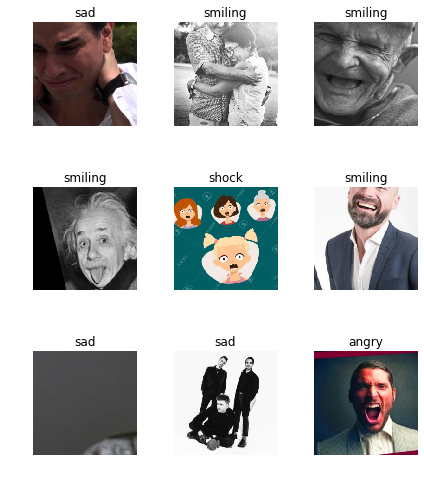

In [13]:
data.show_batch(rows=3, figsize=(6,7))

In [14]:
learn=cnn_learner(data, models.resnet50, metrics=accuracy, wd=0.1)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 97373637.46it/s]


In [15]:

learn.fit_one_cycle(2, slice(1e-04,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,1.642901,1.195062,0.455172,00:23
1,1.346576,1.142531,0.558621,00:13


In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


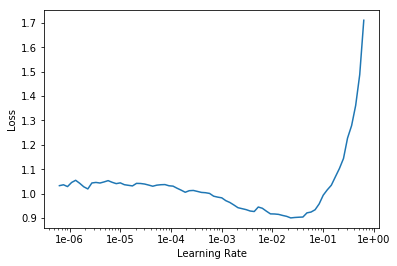

In [17]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(7, max_lr=1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.268900,1.145731,0.662069,00:16


In [0]:
learn.freeze()

In [0]:
interpret=ClassificationInterpretation.from_learner(learn)

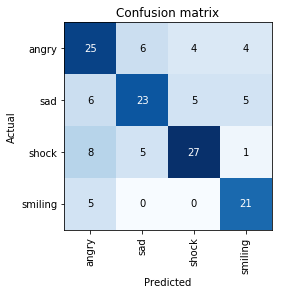

In [27]:
interpret.plot_confusion_matrix()

In [0]:
learn.export('expression_classifier.pkl')

In [0]:
from google.colab import files
files.upload()

In [0]:
#smile_img=open_image('smile.jpg')
#sad1_img=open_image('sad1.jpg')
#sad2_img=open_image('sad2.png')
#angry1_img=open_image('angry1.jpg')
#angry2_img=open_image('angry2.jpg')
test_img=open_image('test.jpg')
#ajay_img=open_image('ajay.JPG')



In [0]:
#cat= smile_img, sad1_img,sad2_img,angry1_img,angry2_img
#for a in cat:
  
#  a.show(figsize=(6,7))
test_img.show(figsize=(6,7))


In [0]:
expression,blah,blahh=learn.predict(test_img)
print(expression)
